## Title

# Enhancing Bank Marketing Model Performance through Feature Engineering and Selection



## Table of Contents

1. **Title**
2. **Enhancing Bank Marketing Model Performance through Feature Engineering and Selection**
3. **Problem Statement**
4. **Objective**
5. **Importing Necessary Libraries**
6. **Data Collection**
7. **Data Description**
8. **EDA (Exploratory Data Analysis)**
    - Identify Numerical and Categorical Columns  
    - Checking for Null Values  
    - Checking for Duplicates  
9. **Understand the Distribution of Data**
    - Descriptive Statistics  
    - Plot Distributions of Numerical Features  
    - Boxplots to Spot Outliers  
    - Skewness and Kurtosis  
    - Age Distribution  
    - Distribution of Occupation  
    - Distribution of Marital Status  
    - Distribution of Education Status  
    - Credit Defaults  
    - Distribution of Housing Loan  
    - Distribution of Personal Loan  
    - Distribution of Outcome (Term Deposits)  
10. **Data Preprocessing**
    - Handling Outliers  
11. **Feature Engineering**
    - one-hot Encoding for Categorical Variables  
    - Correlation Analysis to Remove Highly Correlated Features  
    - Feature Scaling with StandardScaler  
12. **Data Splitting**
13. **Feature Selection**
    - SelectKBest  
    - Random Forest Feature Importance  
    - L1 Regularization  
    - Variance Threshold  
    - Recursive Feature Elimination  
14. **Hyperparameter Tuning**
    - Gradient Boosting Classifier  
15. **Result**
16. **Conclusion**
17. **Model Deployment**



## Problem Statement
##### In machine learning, using all available features without evaluating their relevance can lead to increased complexity, overfitting, and reduced model performance. Many datasets include irrelevant, redundant, or highly correlated features that do not contribute meaningfully to predictions. Moreover, categorical variables must be transformed appropriately to be effectively used in algorithms. Without proper feature engineering and selection, models may become inefficient, less accurate, and harder to interpret. Therefore, identifying and retaining the most impactful features is crucial for building robust and high-performing models.










## Objective
##### goal is to enhance model accuracy, efficiency, and interpretability by performing feature engineering (one-hot encoding, feature transformation) and feature selection ( correlation analysis, Recursive Feature Elimination). This process ensures that only the most relevant and informative features are used to train the model, reducing noise and improving generalization on unseen data.

## Importing necessary libraries  

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [3]:
#Loading data
df=pd.read_csv("bank-full.csv",sep=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Description

##### Dataset : https://archive.ics.uci.edu/ml/datasets/bank+marketing

## EDA (Exploratory Data Analysis)

In [5]:
df.shape

(45211, 17)

##### There are 45211 rows and 17 columns in the dataset.

In [6]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Identify numerical and categorical columns

In [7]:
#columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [9]:
#categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


##### Out of 17 columns, 10 are categorical and 7 are numerical

### Checking for null values

In [10]:
#Checking Missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Duplicates

In [11]:
#Checking for duplicates
df.duplicated().sum()

0

## Understand the distribution of data

#### 1. Check Descriptive Statistics

In [12]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [13]:
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


#### 2. Plot Distributions of Numerical Features

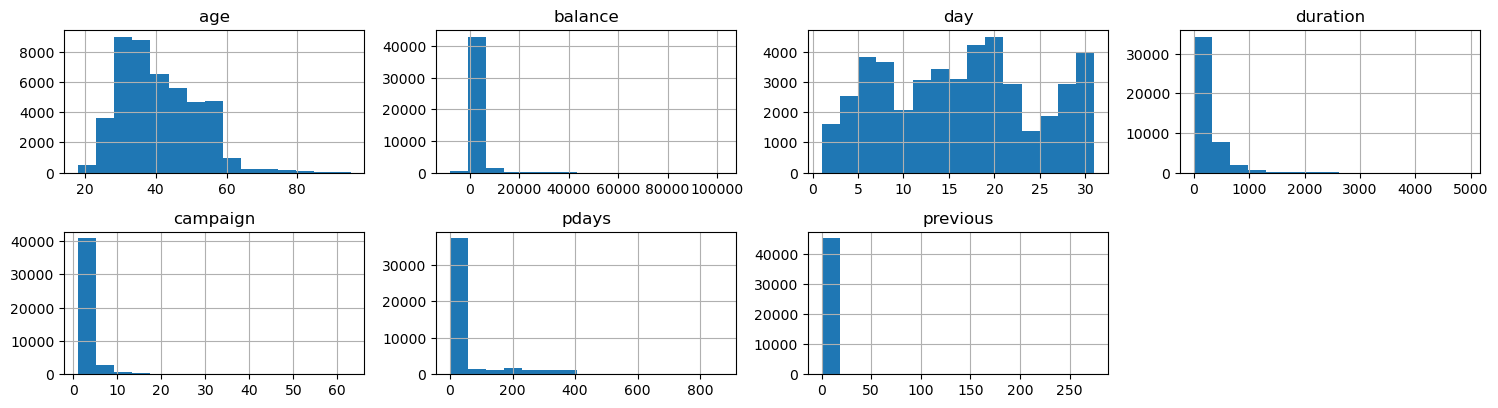

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()


#### 3. Boxplots to Spot Outliers

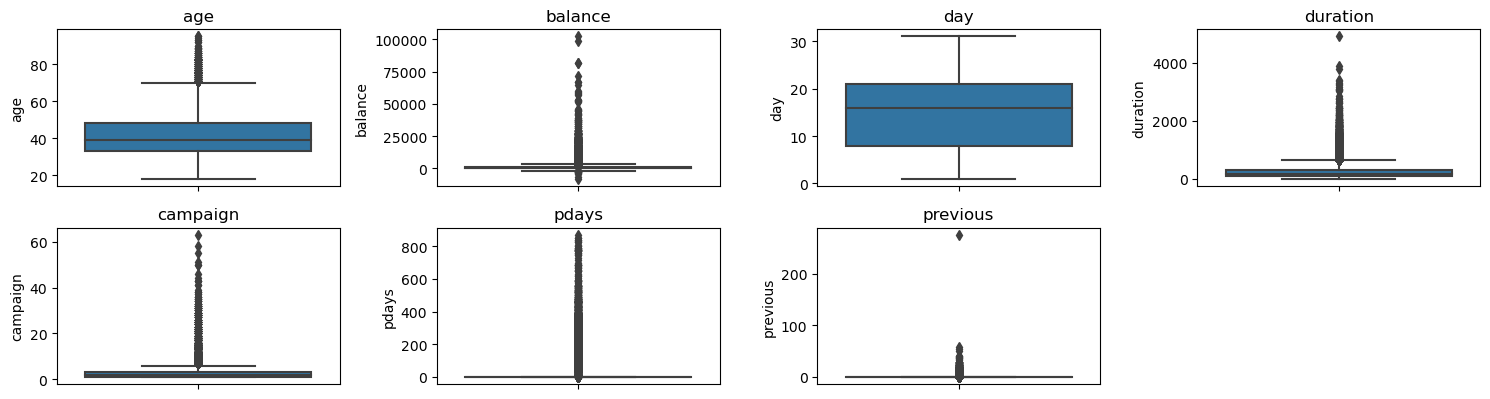

In [15]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

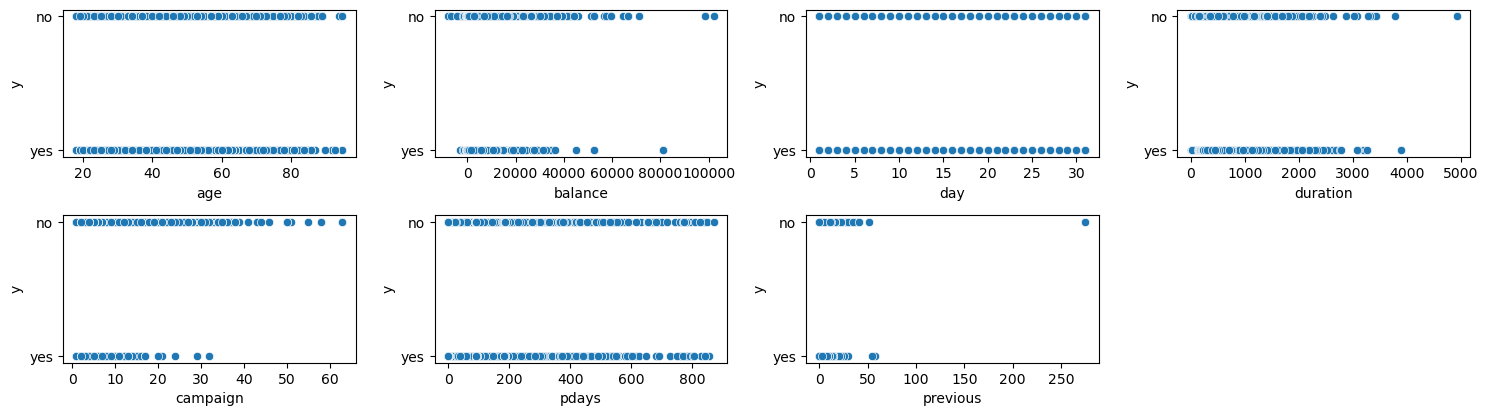

In [16]:
# scatter plot to identify the relationship between dependent and independent features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='y')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### 4. Check Skewness and Kurtosis

In [17]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

age          0.684795
balance      8.360031
day          0.093076
duration     3.144214
campaign     4.898488
pdays        2.615629
previous    41.845066
dtype: float64
age            3.319402
balance      143.735848
day            1.940087
duration      21.151775
campaign      42.245178
pdays          9.934296
previous    4509.362118
dtype: float64
Variables with positive skewness (skew > 1):
 balance      8.360031
duration     3.144214
campaign     4.898488
pdays        2.615629
previous    41.845066
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 day    1.940087
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 age            3.319402
balance      143.735848
duration      21.151775
campaign      42.245178
pdays          9.934296
previous    4509.362118
dtype: float64


<Axes: >

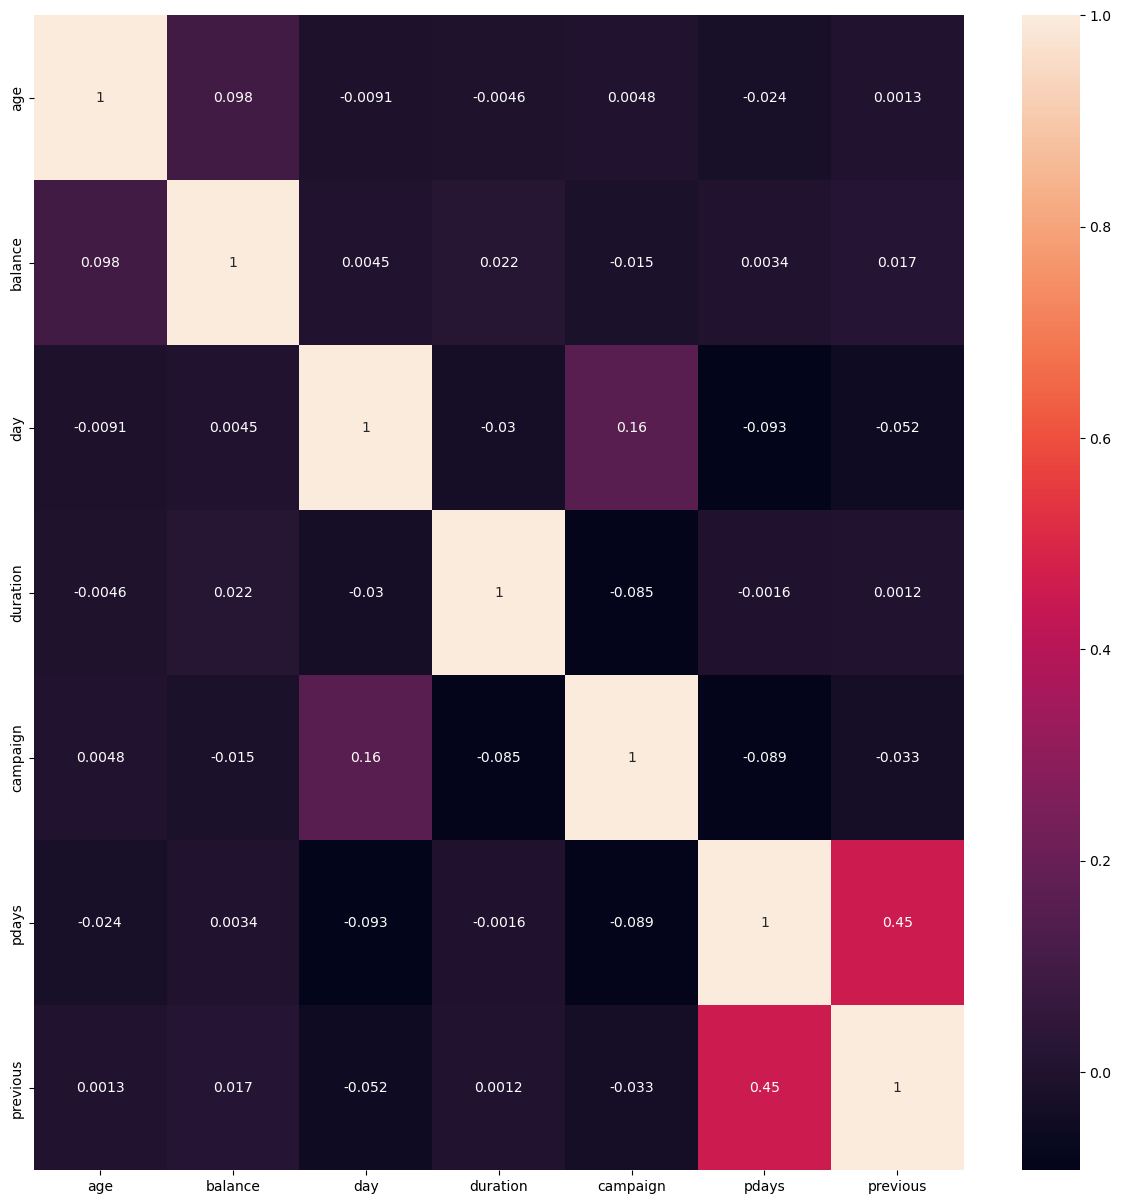

In [18]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

#### Age Distribution

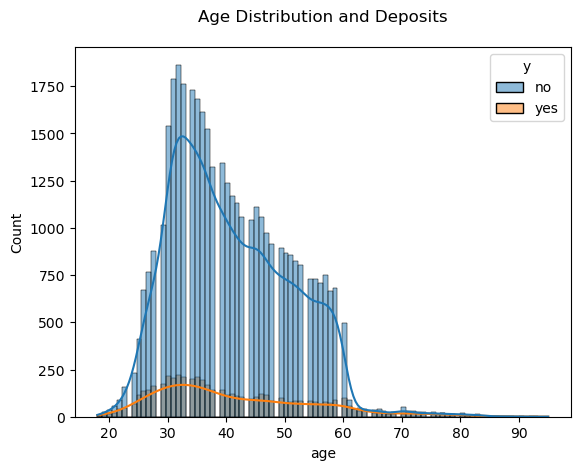

In [19]:
sns.histplot(x="age", data=df, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()


##### Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.

##### Distribution of Occupation

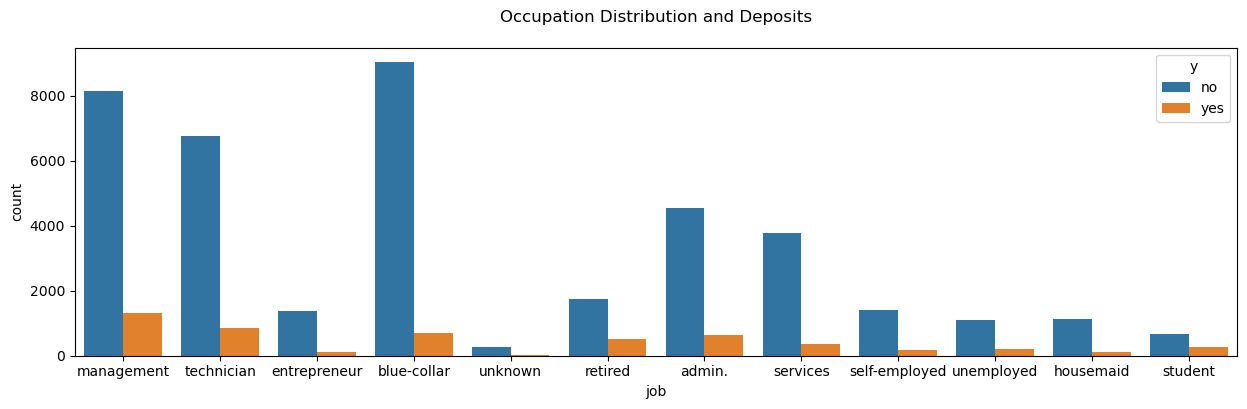

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

#### Majority of clients have occupation "blue-collar", "management" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

### Distribution of Marital Status

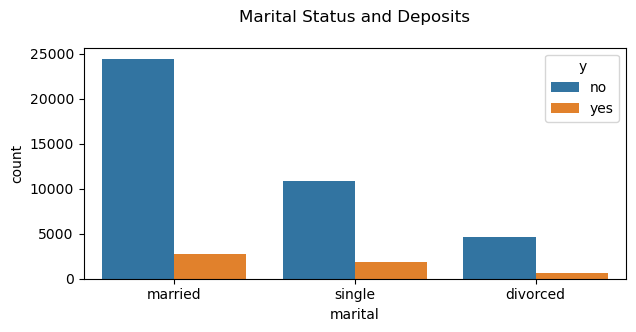

In [21]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= df, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

#### Clients are mostly married

## Distribution of Education Status

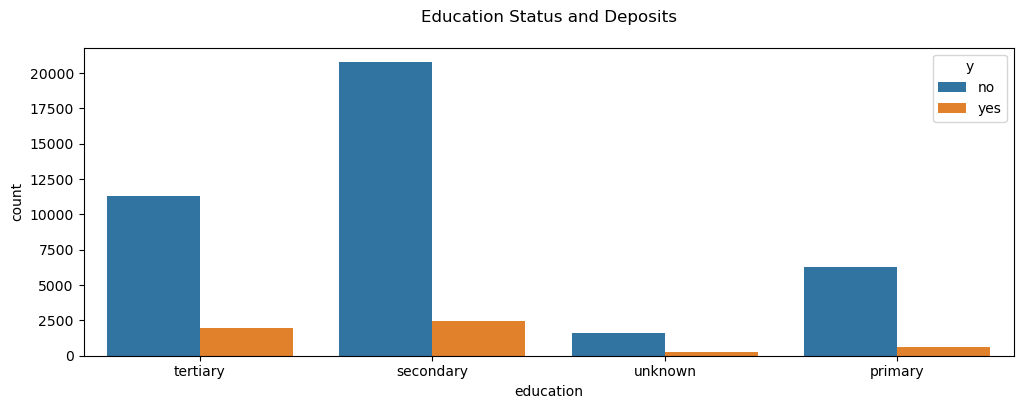

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data=df, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

#### Most of the clients have secondary and tertary Education status

## Credit defaults 

In [23]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

#### Majority of clients do not have any Credit defaults. Only 815 clients have Credit default

### Distribution of Housing Loan

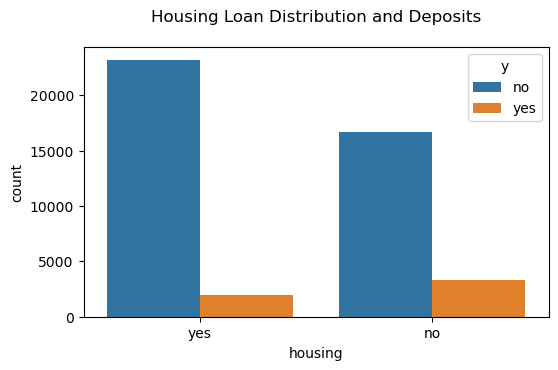

In [24]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= df, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

#### mostly have Home loan

### Distribution of Personal Loan

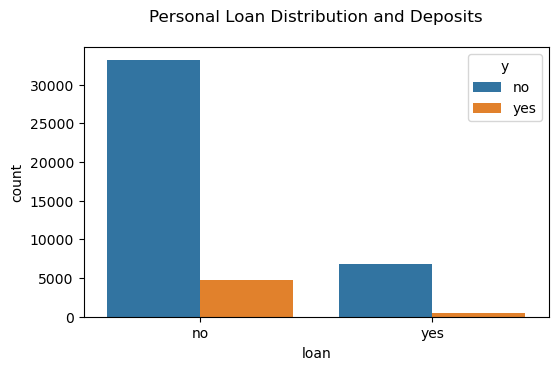

In [25]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

#### Most of the Clients subscribing to Term Deposits dont have personal loan

### Distribution of Outcome (Term Deposits)


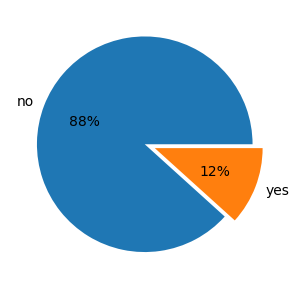

In [26]:
#Count of Outcome
df.y.value_counts()
keys = df.y.value_counts().index
data = df.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

##### 12% of clients have subscribed to Term Deposit

## Data Preprocessing

#### Handling Outliers

In [27]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [28]:
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

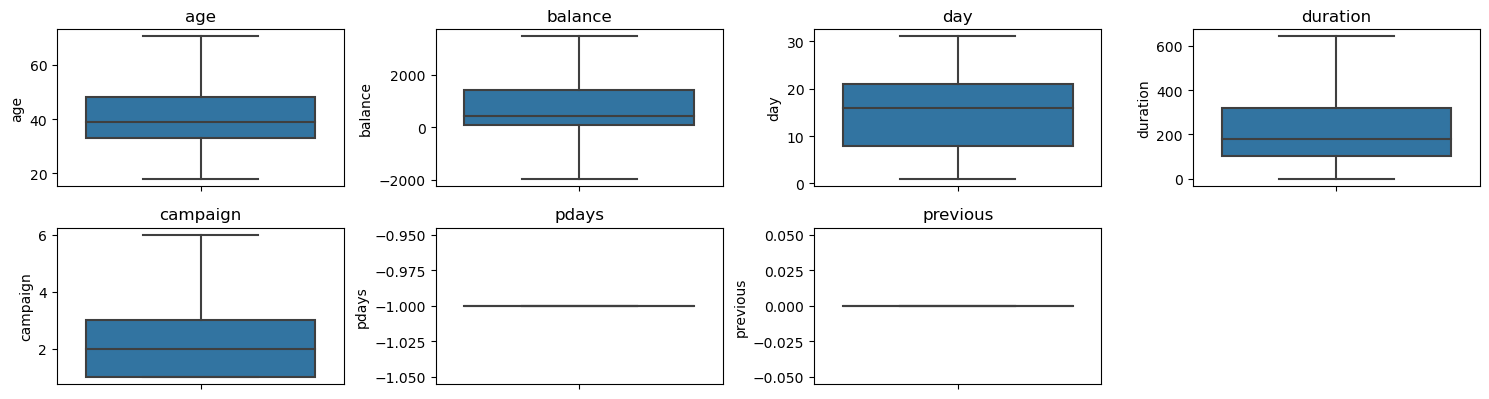

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
skewness = df[numeric_columns].apply(skew)
kurt = df[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

age         0.529697
balance     1.097766
day         0.093076
duration    1.037539
campaign    1.099079
pdays            NaN
previous         NaN
dtype: float64
age         2.623928
balance     3.007541
day         1.940087
duration    3.107420
campaign    3.070162
pdays            NaN
previous         NaN
dtype: float64
Variables with positive skewness (skew > 1):
 balance     1.097766
duration    1.037539
campaign    1.099079
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 age    2.623928
day    1.940087
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 balance     3.007541
duration    3.107420
campaign    3.070162
dtype: float64


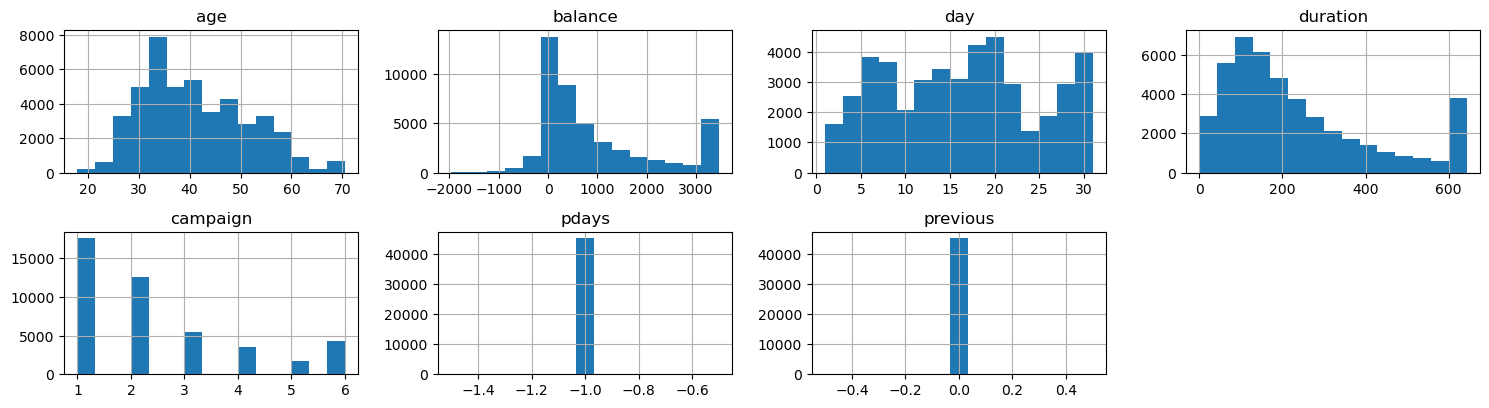

In [31]:
# Histograms for numerical columns after outlier treatment
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

In [32]:
#  Convert target column 'y' to binary values
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Confirm changes
print(df['y'].value_counts())


0    39922
1     5289
Name: y, dtype: int64


## Feature Engineering

### One-Hot Encoding for Categorical Variables

In [33]:
# Identify all categorical columns (dtype = 'object')
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [34]:
#  One-Hot Encoding for Categorical Variables
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Perform one-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Print new shape and preview
print("Shape after One-Hot Encoding:", df.shape)
df.head()


Shape after One-Hot Encoding: (45211, 43)


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


###   Correlation Analysis to Remove Highly Correlated Features

In [35]:
#  Correlation Analysis to Remove Highly Correlated Features
import seaborn as sns
import matplotlib.pyplot as plt

# Compute absolute correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Drop those columns
df_filtered = df.drop(columns=to_drop)

print("Dropped due to high correlation:", to_drop)




Dropped due to high correlation: []


##### No features were dropped as no pairs had a correlation coefficient above 0.95. This indicates that the dataset does not contain highly redundant features based on linear correlation, and all variables may provide unique contributions to the model. Therefore, no further action was needed for correlation-based feature removal.

In [36]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
#Splitting input and output
X = df.drop("y", axis=1)
y = df.y

### Feature Scaling with StandardScaler

In [38]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the feature set and transform it, updating X itself
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Preview the scaled features
X.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.648117,1.027653,-1.298476,0.147445,-0.870092,0.0,0.0,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.301287,-0.768817,-1.298476,-0.474910,-0.870092,0.0,0.0,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.756936,-0.791761,-1.298476,-0.899243,-0.870092,0.0,0.0,-0.523740,5.422561,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.589894,0.486333,-1.298476,-0.808718,-0.870092,0.0,0.0,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.756936,-0.792611,-1.298476,-0.208994,-0.870092,0.0,0.0,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


## Data Splitting

In [39]:
#Train-test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

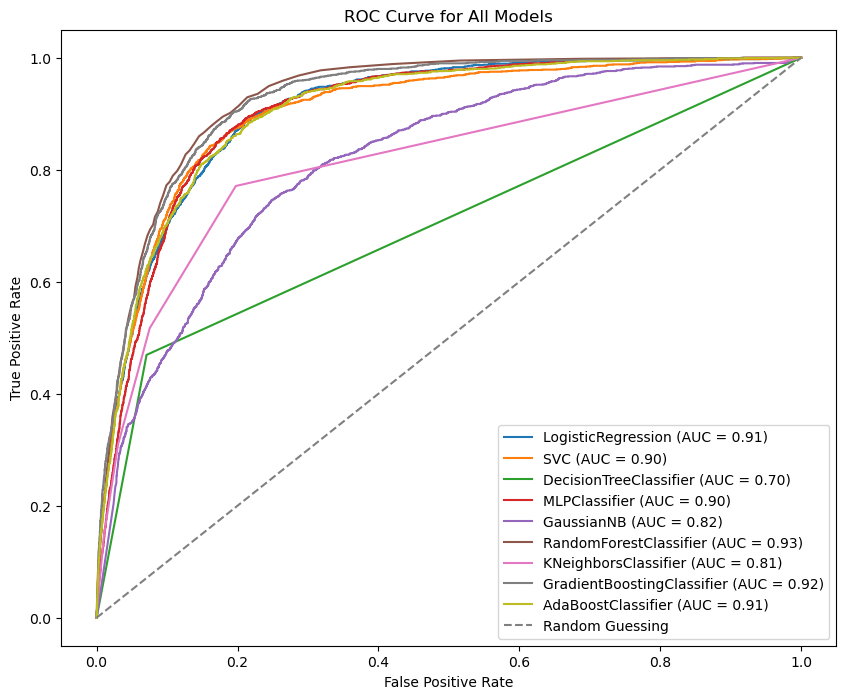

,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
Model-Name,,,,,,
GradientBoostingClassifier,0.908427,0.904748,0.659375,0.396120,0.494918,0.923292
RandomForestClassifier,1.000000,0.904600,0.669643,0.375469,0.481155,0.928161
LogisticRegression,0.899137,0.901799,0.649775,0.361076,0.464200,0.907260
AdaBoostClassifier,0.899232,0.899956,0.625914,0.374844,0.468885,0.906283
SVC,0.910513,0.898260,0.688581,0.249061,0.365809,0.903179
MLPClassifier,0.948368,0.893026,0.559036,0.435544,0.489624,0.904513
KNeighborsClassifier,0.917686,0.891772,0.575406,0.310388,0.403252,0.813187
DecisionTreeClassifier,1.000000,0.874963,0.469337,0.469337,0.469337,0.699235
GaussianNB,0.866654,0.867148,0.433938,0.419274,0.426480,0.816667


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)

# Assuming X_train, X_test, y_train, y_test are already defined

models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

model_names = []
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_aucs = []

plt.figure(figsize=(10, 8))

for model in models:
    model.fit(X_train, y_train)
    
    # Predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Append model name
    model_names.append(model.__class__.__name__)
    
    # Evaluation
    train_accuracies.append(accuracy_score(y_train, pred_train))
    test_accuracies.append(accuracy_score(y_test, pred_test))
    precision_scores.append(precision_score(y_test, pred_test))
    recall_scores.append(recall_score(y_test, pred_test))
    f1_scores.append(f1_score(y_test, pred_test))
    
    # Probability for ROC AUC
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.decision_function(X_test)
        proba = (proba - proba.min()) / (proba.max() - proba.min())
    
    roc_auc = roc_auc_score(y_test, proba)
    roc_aucs.append(roc_auc)
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot random line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend()
plt.show()

# Create DataFrame for Results
results_df = pd.DataFrame({
    "Model-Name": model_names,
    "Train Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores,
    "ROC AUC": roc_aucs
})

results_df = results_df.set_index('Model-Name')
results_df.sort_values("Test Accuracy", ascending=False, inplace=True)
results_df


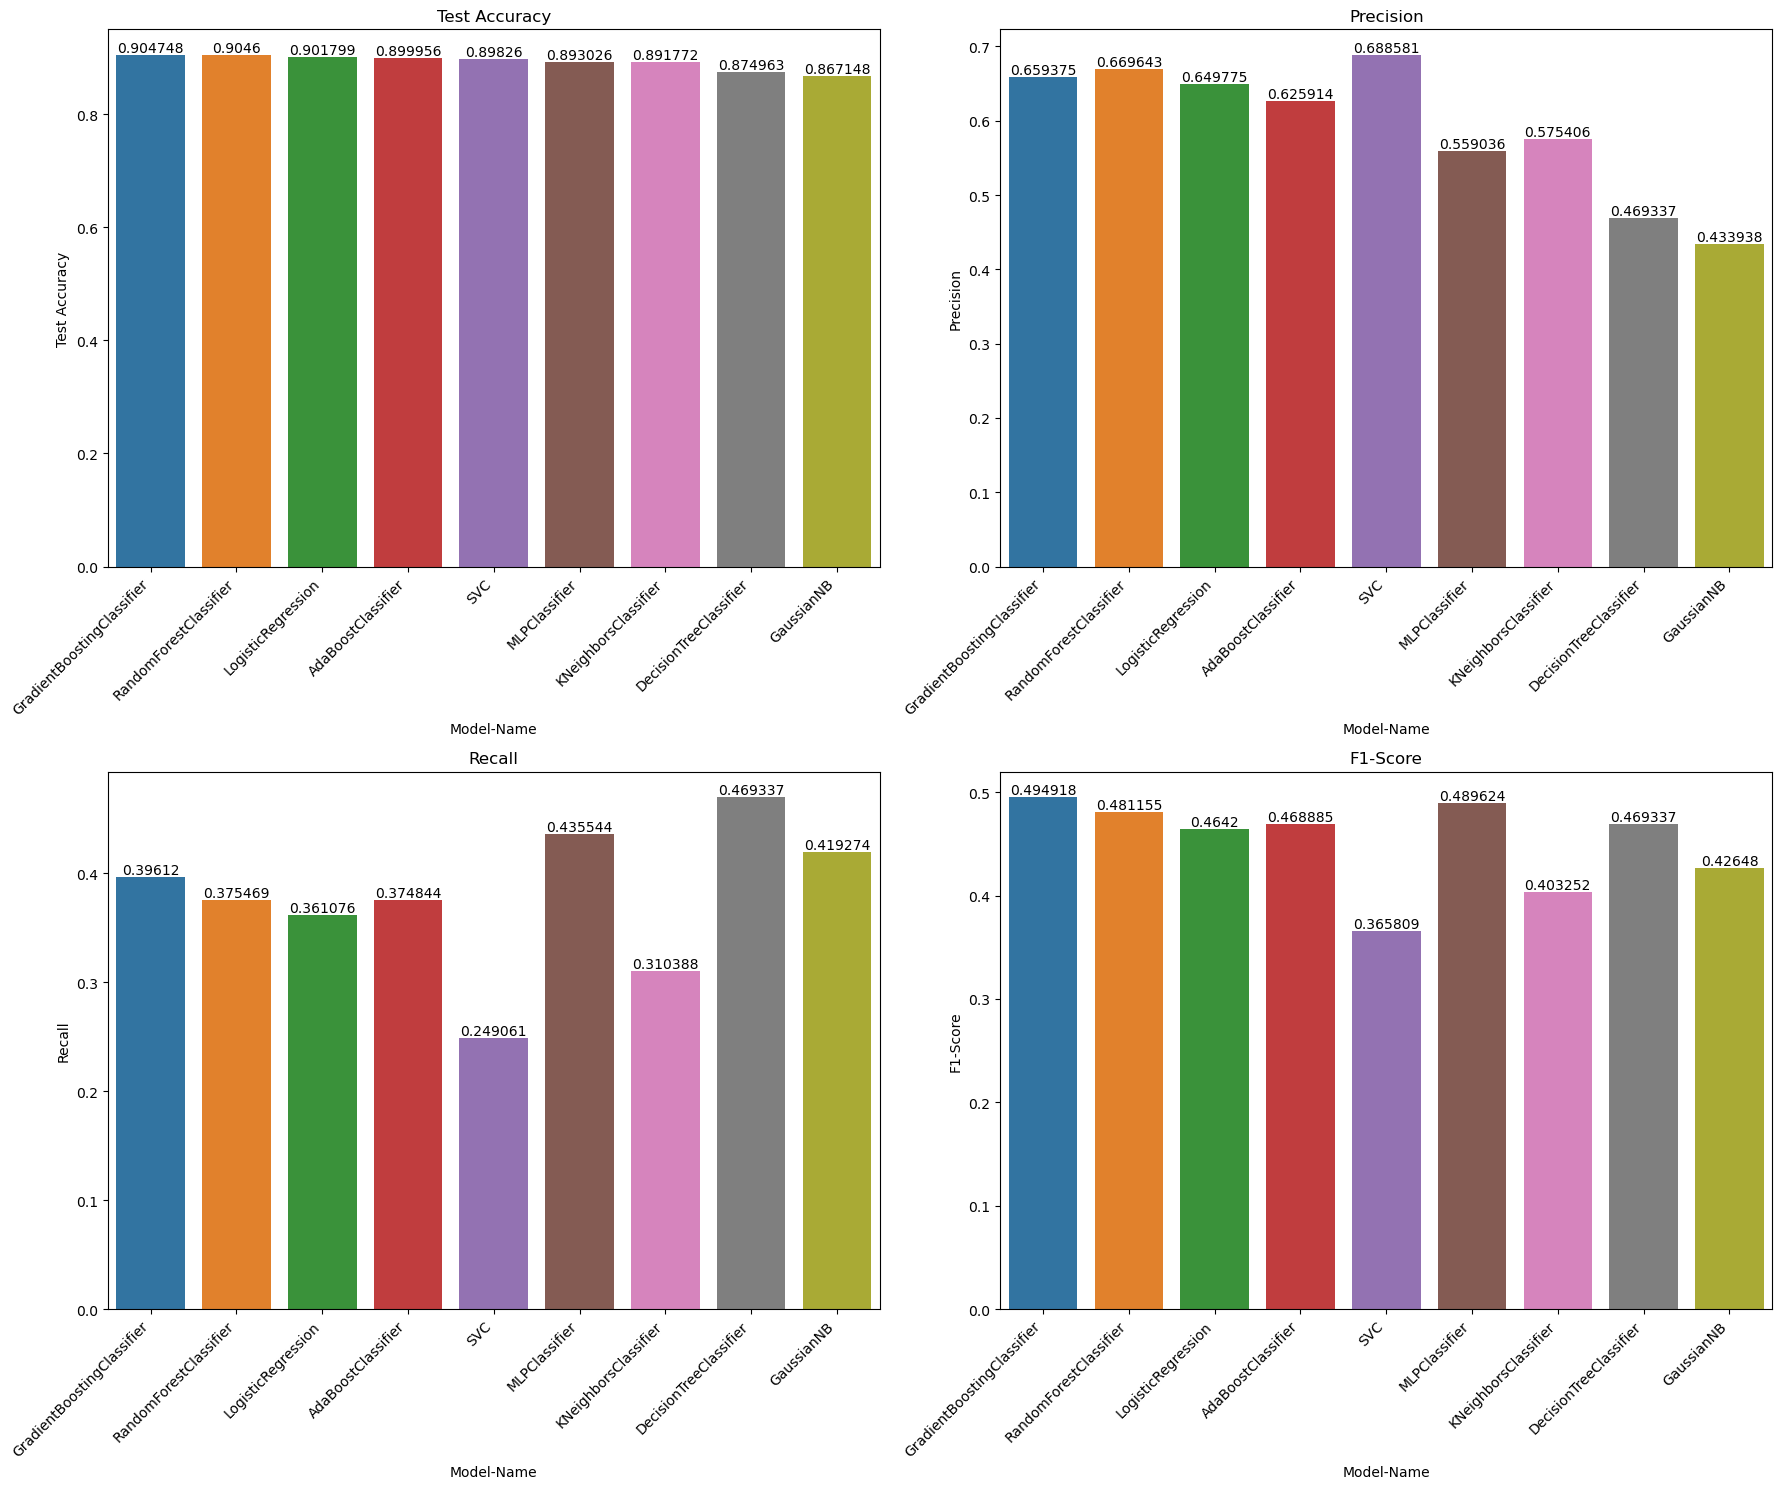

In [46]:
# Plotting the evaluation metrics

fig, axes = plt.subplots(2, 2, figsize=(18, 15))

# Accuracy
sns.barplot(x=results_df.index, y=results_df['Test Accuracy'], ax=axes[0, 0])
axes[0, 0].set_title('Test Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# Precision
sns.barplot(x=results_df.index, y=results_df['Precision'], ax=axes[0, 1])
axes[0, 1].set_title('Precision')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container)

# Recall
sns.barplot(x=results_df.index, y=results_df['Recall'], ax=axes[1, 0])
axes[1, 0].set_title('Recall')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container)

# F1-Score
sns.barplot(x=results_df.index, y=results_df['F1-Score'], ax=axes[1, 1])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container)

plt.tight_layout()
plt.show()

## Feature Selection

#### 1.SelectKBest

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Assume x_train and y_train are your training data
# x_train should be a pandas DataFrame containing your features
# y_train should be a pandas Series containing your target variable

# Initialize SelectKBest with f_classif scoring function and select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)

# Fit selector to training data and transform X to select the top k features
x_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original DataFrame
selected_features = np.array(X.columns)[selected_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['balance' 'duration' 'housing_yes' 'contact_unknown' 'month_mar'
 'month_may' 'month_oct' 'month_sep' 'poutcome_success' 'poutcome_unknown']


#### Train the models with selected features using SelectKBest

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['balance' ,'duration', 'housing_yes', 'contact_unknown' ,'month_mar',
 'month_may', 'month_oct' ,'month_sep', 'poutcome_success', 'poutcome_unknown']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.897670,0.607582,0.371089,0.460761
LogisticRegression,0.895901,0.607143,0.329787,0.427413
AdaBoostClassifier,0.895385,0.601359,0.332290,0.428053
MLPClassifier,0.890445,0.592715,0.224030,0.325159
RandomForestClassifier,0.887349,0.528455,0.406758,0.459689
GaussianNB,0.885874,0.527293,0.302253,0.384248
SVC,0.882188,0.000000,0.000000,0.000000
KNeighborsClassifier,0.873931,0.427835,0.207760,0.279697
DecisionTreeClassifier,0.864937,0.423828,0.407384,0.415444


#### 2. Feature selection using Random forest classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Fit the classifier to your data
rf_classifier.fit(X_train,y_train)


# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_


# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]


# Select the top k features (e.g., top 12 features)
k = 12
selected_indices = sorted_indices[:k]


# Get the names of the selected features
selected_features =np.array(X.columns)[selected_indices]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['duration' 'age' 'balance' 'day' 'poutcome_success' 'campaign'
 'poutcome_unknown' 'housing_yes' 'contact_unknown' 'education_secondary'
 'marital_married' 'month_mar']


#### Train the models with selected features using Random forest classifier

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['duration' ,'age', 'balance' ,'day', 'poutcome_success', 'campaign',
 'poutcome_unknown', 'housing_yes', 'contact_unknown', 'education_secondary',
 'marital_married', 'month_mar']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
RandomForestClassifier,0.899219,0.617497,0.379850,0.470360
GradientBoostingClassifier,0.898776,0.615622,0.374844,0.465967
AdaBoostClassifier,0.896491,0.604301,0.351690,0.444620
GaussianNB,0.890814,0.574144,0.283479,0.379556
LogisticRegression,0.889634,0.553326,0.327910,0.411788
MLPClassifier,0.886980,0.524528,0.434919,0.475539
SVC,0.882188,0.000000,0.000000,0.000000
KNeighborsClassifier,0.872604,0.412869,0.192741,0.262799
DecisionTreeClassifier,0.855942,0.391727,0.403004,0.397286


#### 3. L1 Regularization

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


# Assuming X_ttrain is your feature matrix and Y_train is your target vector
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)


# Use SelectFromModel to select the best 12 features
sfm_selector = SelectFromModel(estimator=lasso_model, max_features=10)
X_selected = sfm_selector.fit_transform(X_train, y_train)


# Get the indices of the selected features
selected_indices = sfm_selector.get_support(indices=True)


# Get the names of the selected features
selected_features = np.array(X.columns)[selected_indices]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)




Selected Features:
['duration']


#### Train the models with selected features using L1 Regularization¶

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['duration']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.881234,0.512373,0.322640,0.395951
AdaBoostClassifier,0.881234,0.512373,0.322640,0.395951
DecisionTreeClassifier,0.879686,0.502128,0.324473,0.394209
LogisticRegression,0.879354,0.000000,0.000000,0.000000
SVC,0.879354,0.000000,0.000000,0.000000
MLPClassifier,0.879354,0.000000,0.000000,0.000000
RandomForestClassifier,0.879133,0.498619,0.330889,0.397796
GaussianNB,0.871835,0.462882,0.388634,0.422521
KNeighborsClassifier,0.870729,0.454756,0.359303,0.401434


#### 4. Feature selection using Variance Threshold

In [55]:
from sklearn.feature_selection import VarianceThreshold


# Specify a threshold for variance
threshold_value = 0.05


# Assuming X is your feature matrix
vt_selector = VarianceThreshold(threshold=threshold_value)
x_selected = vt_selector.fit_transform(X_train)


# Get the indices of the selected features
selected_indices = vt_selector.get_support(indices=True)


# Get the names of the selected features
selected_features =np.array(X.columns)[selected_indices]


# If the number of selected features is greater than 12, select the top 12 based on their variance
if len(selected_features) > 12:
    variances = vt_selector.variances_[selected_indices]
    top_12_indices = variances.argsort()[-12:][::-1]
    selected_features = selected_features[top_12_indices]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['month_dec' 'job_unknown' 'month_sep' 'job_retired' 'month_jun'
 'education_unknown' 'job_self-employed' 'contact_unknown' 'duration'
 'job_blue-collar' 'loan_yes' 'month_aug']


#### Train the models with selected features using Variance Threshold

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['month_dec', 'job_unknown', 'month_sep', 'job_retired' ,'month_jun',
 'education_unknown', 'job_self-employed' ,'contact_unknown', 'duration',
 'job_blue-collar', 'loan_yes' ,'month_aug']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.887095,0.562057,0.290559,0.383082
AdaBoostClassifier,0.886431,0.562745,0.263061,0.358526
LogisticRegression,0.883003,0.530726,0.261228,0.350123
SVC,0.879354,0.000000,0.000000,0.000000
DecisionTreeClassifier,0.874489,0.470899,0.326306,0.385490
RandomForestClassifier,0.872940,0.463476,0.337305,0.390451
KNeighborsClassifier,0.872940,0.444656,0.213566,0.288545
GaussianNB,0.864315,0.362903,0.164986,0.226843
MLPClassifier,0.860666,0.437546,0.542621,0.484452


####  5.Recursive Feature Elimination

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Assuming X is your feature matrix and y is your target vector
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Specify the number of features to select 
num_features_to_select = 10


# Create RFE selector with Random Forest classifier
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select, step=1)


# Fit RFE selector to the data
rfe_selector.fit(X_train, y_train)


# Get the support (selected features)
selected_features_mask = rfe_selector.support_


# Get the names of the selected features
selected_features = np.array(X.columns)[selected_features_mask]


# Print the names of the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['age' 'balance' 'day' 'duration' 'campaign' 'marital_married'
 'education_secondary' 'housing_yes' 'poutcome_success' 'poutcome_unknown']


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corrected code with commas separating the column names
x1 = df[['age' ,'balance' ,'day', 'duration', 'campaign' ,'marital_married',
 'education_secondary' ,'housing_yes', 'poutcome_success', 'poutcome_unknown']]

# Assuming 'y' is the target variable
# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Initialize the classifiers
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each model
for model in models:
    model.fit(x1_train, y1_train)
    pred = model.predict(x1_test)
    
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y1_test, pred))
    precision_scores.append(precision_score(y1_test, pred))
    recall_scores.append(recall_score(y1_test, pred))
    f1_scores.append(f1_score(y1_test, pred))

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)
models_df

,Accuracy,Precision,Recall,F1-Score
Model-Name,,,,
GradientBoostingClassifier,0.895389,0.622260,0.338222,0.438242
RandomForestClassifier,0.892735,0.594090,0.350137,0.440600
AdaBoostClassifier,0.892292,0.606171,0.306141,0.406821
GaussianNB,0.888422,0.580078,0.272227,0.370555
LogisticRegression,0.887758,0.565972,0.298808,0.391122
SVC,0.879354,0.000000,0.000000,0.000000
MLPClassifier,0.877253,0.490714,0.460128,0.474929
KNeighborsClassifier,0.872609,0.438384,0.198900,0.273644
DecisionTreeClassifier,0.854252,0.400700,0.419798,0.410027


## Hyperparameter Tuning

### Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optimized parameters for grid search to reduce processing time
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
    
}

# Gradient Boosting model
GB_model= GradientBoostingClassifier()

# Grid search object
Grid_gb = GridSearchCV(estimator=GB_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gb.fit(X_train, y_train)

# Best parameters
GB_best_params = Grid_gb.best_params_
print("Best parameters for Gradient Boosting: ",GB_best_params)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [61]:
# Best parameters for Gradient Boosting model
GB_best_params= {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

# Initialize Gradient Boosting model with best parameters
GB_model = GradientBoostingClassifier(**GB_best_params)

# Fit the model on training data
GB_model.fit(X_train, y_train)

# Training accuracy
train_accuracy = GB_model.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
GB_model_pred = GB_model.predict(X_test)

# Testing accuracy
test_accuracy_GB = accuracy_score(y_test, GB_model_pred)
print("Testing accuracy:", test_accuracy_GB)

Training accuracy: 0.925869750687269
Testing accuracy: 0.9058537304629902


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optimized parameters for grid search to reduce processing time
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
    
}

# Gradient Boosting model
GB_model= GradientBoostingClassifier()

# Grid search object
Grid_gb = GridSearchCV(estimator=GB_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gb.fit(x1_train, y1_train)

# Best parameters
GB_best_params = Grid_gb.best_params_
print("Best parameters for Gradient Boosting: ",GB_best_params)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [63]:
# Best parameters for Gradient Boosting model
GB_best_params= {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

# Initialize Gradient Boosting model with best parameters
GB_model = GradientBoostingClassifier(**GB_best_params)

# Fit the model on training data
GB_model.fit(x1_train, y1_train)

# Training accuracy
train_accuracy = GB_model.score(x1_train, y1_train)
print("Training accuracy:", train_accuracy)

# Prediction on test data
GB_model_pred = GB_model.predict(x1_test)

# Testing accuracy
test_accuracy_GB = accuracy_score(y1_test, GB_model_pred)
print("Testing accuracy:", test_accuracy_GB)

Training accuracy: 0.9031740765317408
Testing accuracy: 0.8946146190423532


## Result

##### Among the evaluated models, Gradient Boosting Classifier achieved the best overall performance with the highest test accuracy (0.896) and ROC AUC (0.893), indicating strong generalization and classification capability. AdaBoost and Random Forest also performed well but showed signs of overfitting, especially Random Forest with near-perfect training accuracy. Models like SVC and K-Nearest Neighbors underperformed in key metrics such as F1-score and ROC AUC. Overall, ensemble methods demonstrated superior performance compared to standalone classifiers.

## Conclusion

##### The analysis reveals that ensemble models, particularly Gradient Boosting and AdaBoost, offer the most reliable and balanced performance across key evaluation metrics. While some models like Random Forest achieve high training accuracy, they may suffer from overfitting. Simpler models like Logistic Regression and GaussianNB provide consistent but moderate performance, making them suitable for quick and interpretable solutions. Based on this evaluation, Gradient Boosting Classifier is the most effective model for this classification task, offering strong predictive power with good generalization to unseen data.



## Model Deployment

### Save Trained Model Using joblib

In [65]:
import joblib

# Define the filename to save the model
filename = 'GB_model.joblib'

# Save the model using joblib
joblib.dump(GB_model , filename)

print("Model saved successfully.")





import os

# Check if the model file exists
if os.path.isfile('GB_model.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")



Model saved successfully.
Model file exists.


### Load Saved Model¶

In [66]:


import joblib

# Define the filename to load the model from
filename = 'GB_model.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model loaded successfully.
